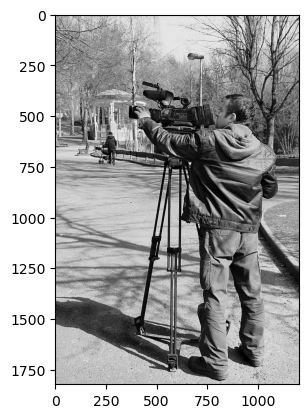

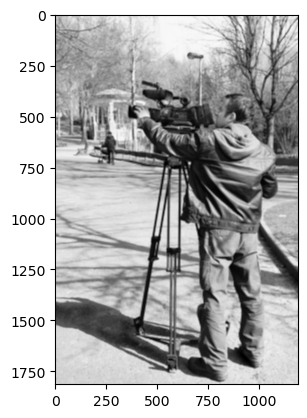

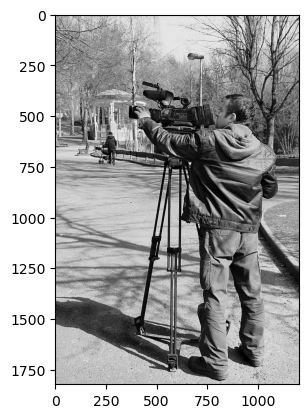

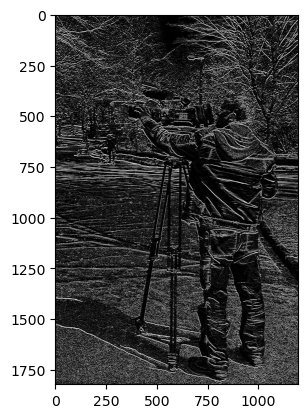

In [5]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def conv(image, im_filter):
    """
    :param image: grayscale image as a 2-dimensional numpy array
    :param im_filter: 2-dimensional numpy array
    """
    # input dimensions
    height = image.shape[0]
    width = image.shape[1]
    # output image with reduced dimensions
    im_c = np.zeros((height - len(im_filter) + 1,width - len(im_filter) + 1))
    # iterate over all rows and columns
    for row in range(len(im_c)):
        for col in range(len(im_c[0])):
            # apply the filter
            for i in range(len(im_filter)):
                for j in range(len(im_filter[0])):
                    im_c[row, col] += image[row + i, col + j] *im_filter[i][j]
    # fix out-of-bounds values
    im_c[im_c > 255] = 255
    im_c[im_c < 0] = 0
    # plot images for comparison
    plt.figure()
    plt.imshow(image, cmap=cm.Greys_r)
    plt.show()
    plt.imshow(im_c, cmap=cm.Greys_r)
    plt.show()

# load the image
url='https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Cameraman_J1.jpg/1200px-Cameraman_J1.jpg'
resp = requests.get(url)

image_rgb =np.asarray(Image.open(BytesIO(resp.content)).convert("RGB"))
# convert to grayscale
image_grayscale = np.mean(image_rgb, axis=2, dtype=np.uint)
# blur filter
blur = np.full([10, 10], 1. / 100)
conv(image_grayscale, blur)
# Sobel edge detectors
sobel_x = [[-1, -2, -1],[0, 0, 0],
[1, 2, 1]]
conv(image_grayscale, sobel_x)
sobel_y = [[-1, 0, 1],
[-2, 0, 2],
[-1, 0, 1]]

 conv(image_grayscale, sobel_y)

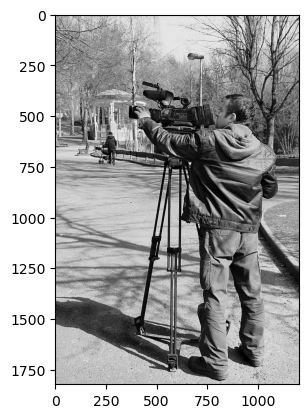

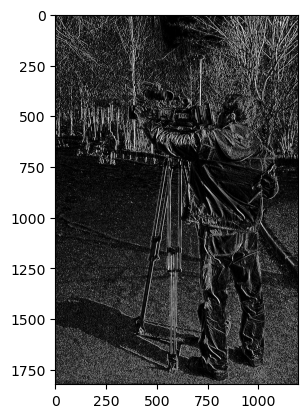

In [7]:
conv(image_grayscale, sobel_y)

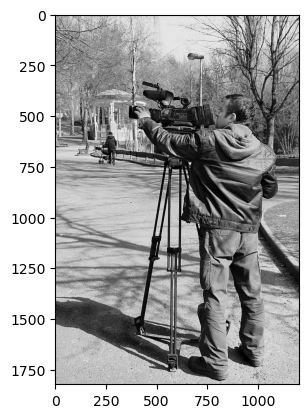

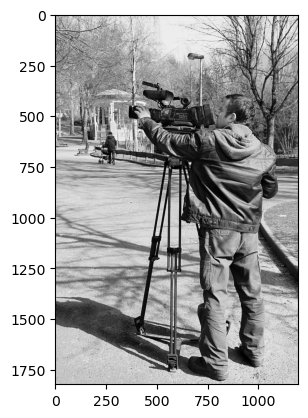

In [8]:
# Gaussian filter 
gauss = (1/16)*np.array([[1, 2, 1],
                        [2, 4, 2],
                        [1, 2, 1]])

conv(image_grayscale, gauss)

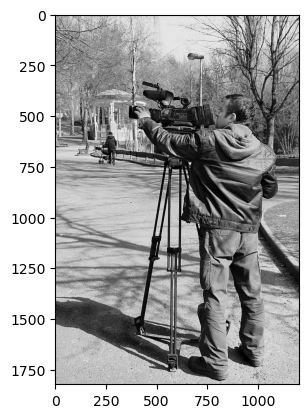

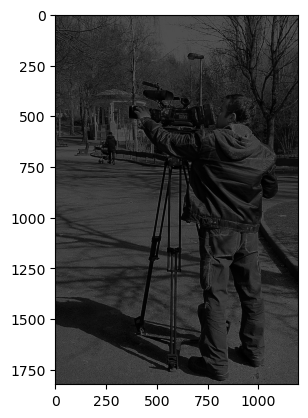

In [10]:
# High pass filter
h_p = (1/16)*np.array([[-1, -2, -1],
                        [-2, 16, -2],
                        [-1, -2, -1]])

conv(image_grayscale, h_p)